In [1]:
import sys
sys.path.append('../scripts')
from sklearn.tree import DecisionTreeRegressor
from scripts.cross_validation import loocv, k_fold_cv
from scripts.data_preprocessing import load_data, exclude_outliers

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered, outliers = exclude_outliers(X, y)

param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

decision_tree = DecisionTreeRegressor()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Tea\AppData\Local\Temp\ipykernel_2764\2245739775.py", line 3, in <module>
    from sklearn.tree import DecisionTreeRegressor
  File "C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\__init__.py", line 82, in <module>
    from .base import clone
  File "C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 17, in <module>
    from .utils import _IS_32BIT
  File "C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\__init__.py", line 25, in <module>
    from .fixes import parse_version, threadpool_info
  File "C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\fixes.py", line 19, in <module>
    import scipy.stats
 


6-fold
Fitting 6 folds for each of 20736 candidates, totalling 124416 fits


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

Best Parameters: {'ccp_alpha': 0.01, 'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


R squared (CV): -0.29959735119692454
Average MSE (CV): 155.68262411347519
Average RMSE (CV): 12.477284324462403
Average MAE (CV): 5.7695035460992905


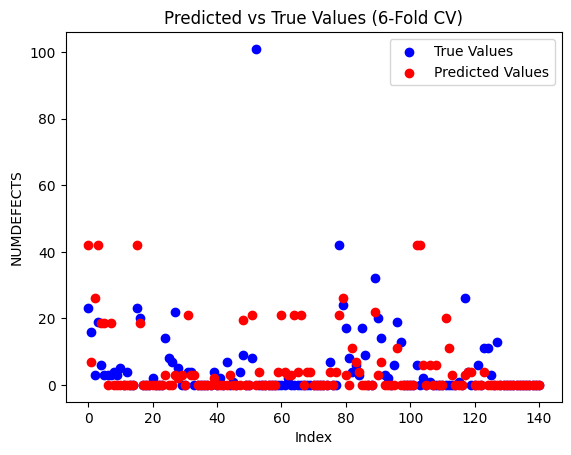

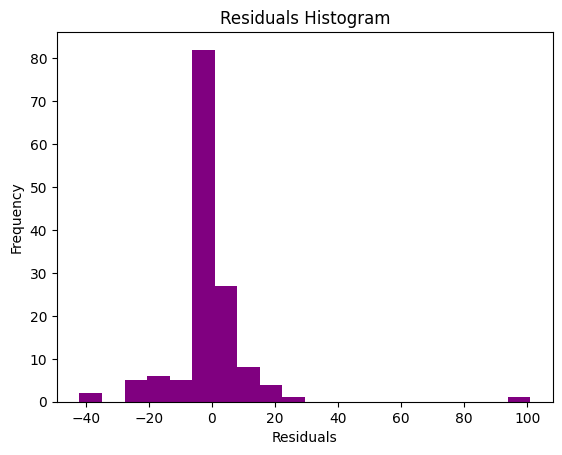

In [2]:
print('\n6-fold')
k_fold_cv(X, y, decision_tree, 6, param_grid=param_grid)

In [7]:
best_hyperparameters = {'ccp_alpha': 0.01, 'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}

decision_tree_tuned = DecisionTreeRegressor(**best_hyperparameters)

LOOCV


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

R squared (LOOCV): 0.14711009890813076
Average MSE (LOOCV): 102.17021276595744
Average RMSE (LOOCV): 10.107928213336175
Average MAE (LOOCV): 4.652482269503546


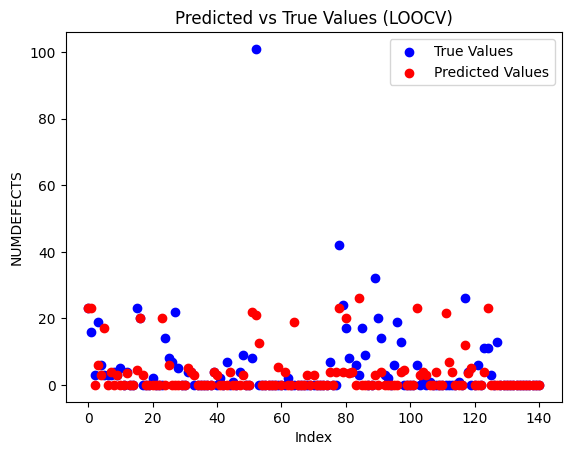

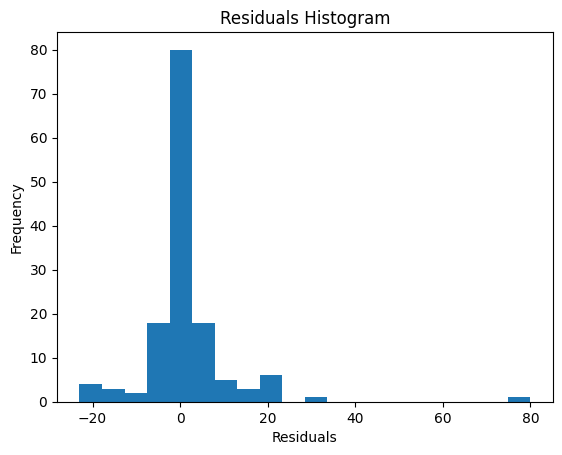

In [8]:
print('LOOCV')
loocv(X, y, decision_tree_tuned)

LOOCV


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

R squared (LOOCV): -0.3324973794001438
Average MSE (LOOCV): 55.326771653543304
Average RMSE (LOOCV): 7.438196801210849
Average MAE (LOOCV): 4.086614173228346


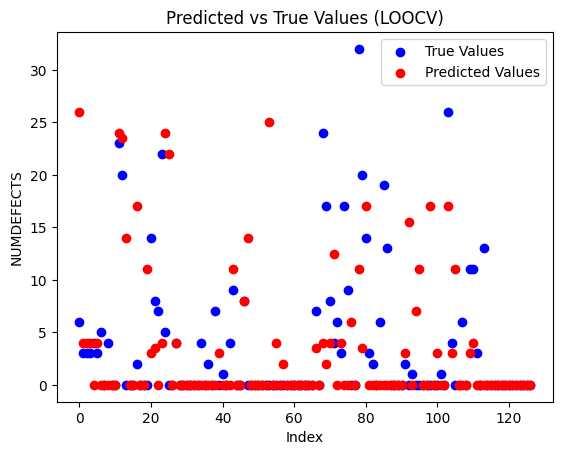

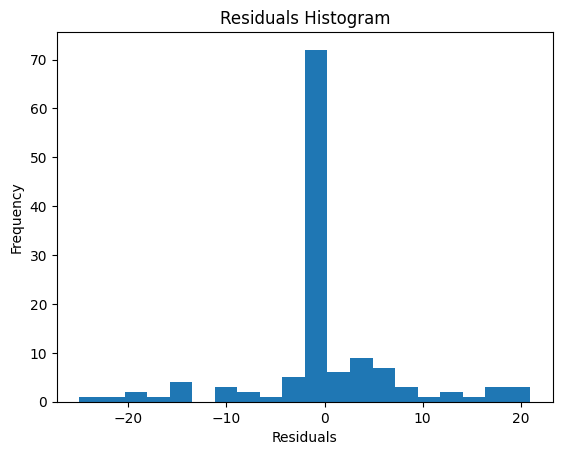


6-fold


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

R squared (CV): 0.10357715613399554
Average MSE (CV): 37.22047244094488
Average RMSE (CV): 6.100858336410122
Average MAE (CV): 3.5511811023622046


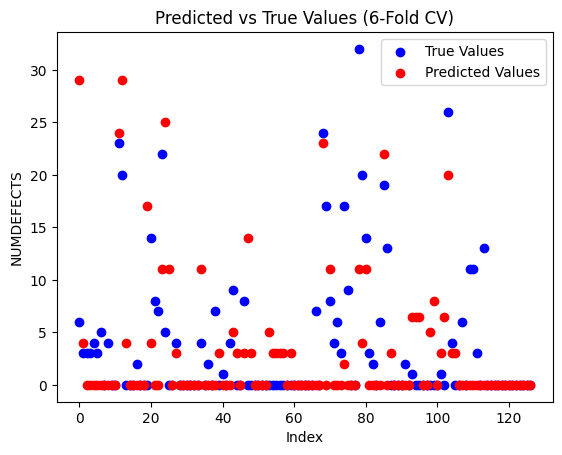

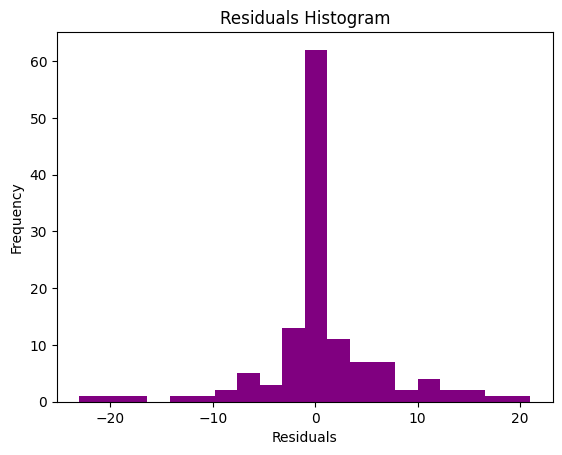

In [10]:
print('LOOCV')
loocv(X_filtered, y_filtered, decision_tree_tuned)

print('\n6-fold')
k_fold_cv(X_filtered, y_filtered, decision_tree_tuned, 6)